In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
 
df = pd.read_csv('TitanicDataset_SURVIVAL-PREDICTION.csv')
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
df.notnull().sum()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Questions:**

how many have died?

how many have survived?

how many have males and females have survived?

how many have males and females have not survived?

what are the classes of survived?

what is the average age for those who survived vs. those who didnt?

what was the median age for those who survived vs. those who didn't?

what were the mean ages by class of survived passangers?


***How many survived?***

***How many died?***

In [19]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

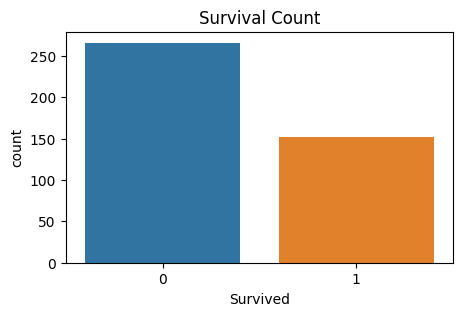

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(data=df , x='Survived')
plt.title('Survival Count')
plt.show()

In [21]:
genderSurvival = pd.crosstab(df["Sex"],df["Survived"])
print(genderSurvival)

Survived    0    1
Sex               
female      0  152
male      266    0


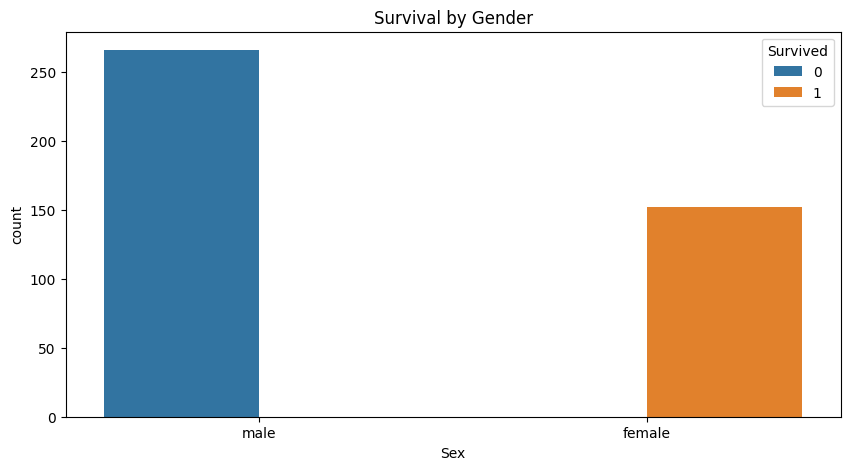

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df,x="Sex",hue="Survived")
plt.title('Survival by Gender')
plt.show()

In [26]:
print(df["Sex"].value_counts())

Sex
male      266
female    152
Name: count, dtype: int64


why all the males died and why all the females survived?

In [30]:
agesSurvived = pd.crosstab(df['Age'],df['Sex'])
print(agesSurvived)

Sex    female  male
Age                
0.17        1     0
0.33        0     1
0.75        0     1
0.83        0     1
0.92        1     0
...       ...   ...
62.00       0     1
63.00       1     1
64.00       2     1
67.00       0     1
76.00       1     0

[79 rows x 2 columns]


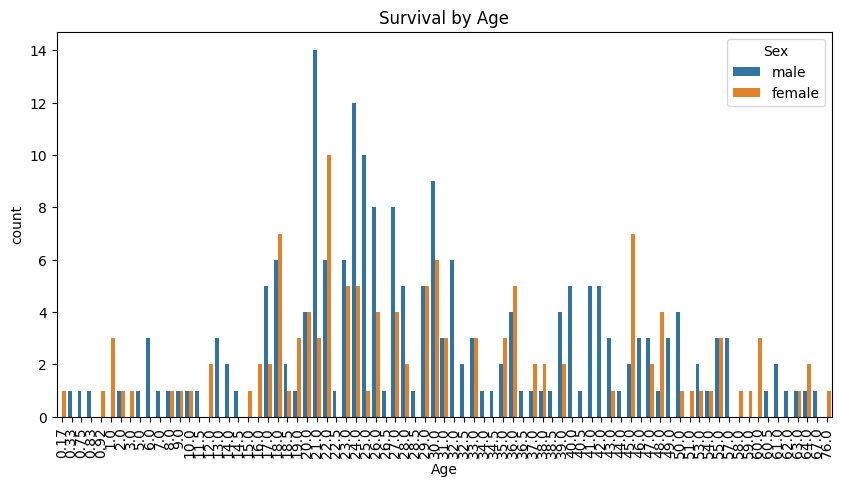

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df,x="Age",hue="Sex")
plt.title('Survival by Age')
plt.xticks(rotation=90)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# import xgboost as xgb



In [44]:
new_df = df.drop(['PassengerId','Name','Ticket','Cabin','Age','Fare'],axis =1)

In [45]:
# Handle missing values
new_df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
le = LabelEncoder()
new_df['Sex'] = le.fit_transform(df['Sex'])
new_df['Embarked'] = le.fit_transform(df['Embarked'])

# Select features and target variable
X = new_df.drop(['Survived'],axis = 1)
y = df['Survived']


In [46]:
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,1,0,0,7.8292,1
1,3,0,1,0,7.0000,2
2,2,1,0,0,9.6875,1
3,3,1,0,0,8.6625,2
4,3,0,1,1,12.2875,2
...,...,...,...,...,...,...
413,3,1,0,0,8.0500,2
414,1,0,0,0,108.9000,0
415,3,1,0,0,7.2500,2
416,3,1,0,0,8.0500,2


In [47]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Classifier

In [66]:

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [67]:
y_pred = clf.predict(X_test)


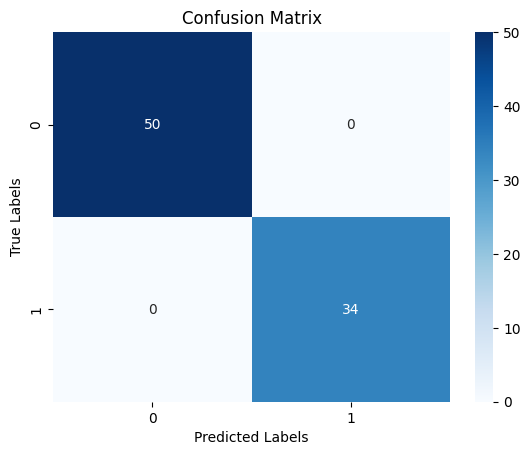

In [68]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [69]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



KNeighbors Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5, p = 1)
clf.fit(X_train,y_train)

KNeighborsClassifier(p=1)

In [71]:
y_pred = clf.predict(X_test)

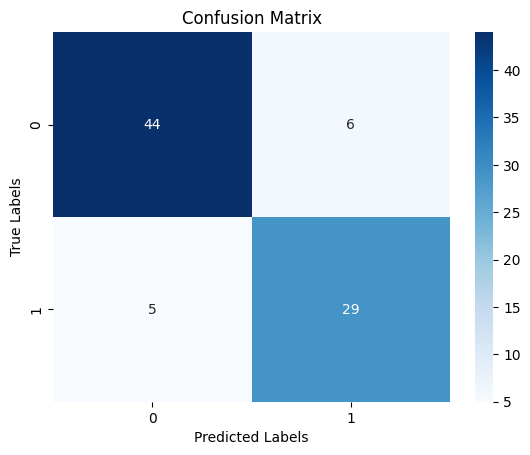

In [72]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [58]:
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        50
           1       0.83      0.85      0.84        34

    accuracy                           0.87        84
   macro avg       0.86      0.87      0.86        84
weighted avg       0.87      0.87      0.87        84

